In [ ]:
from sklearn import datasets
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'15GqbnEyOoBZT8M7zT676d35RTVa0utPA'}) # replace the id with id of file you want to access
downloaded.GetContentFile('bikes.csv') 

## Step 1: Reading and Understanding the Data

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
# Read the data from csv file

df = pd.read_csv('bikes.csv')

In [ ]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# checking the shape of dataframe

df.shape

(17379, 17)

In [ ]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# renaming few columns for better readibility

#df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

df.rename(columns={'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'},inplace=True)

In [ ]:
# Check the head of the dataset

df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Copying the dataframe into new

df_copy = df.copy()

In [ ]:
# checking the shape of new dataframe

df_copy.shape

(17379, 17)

In [ ]:
# dropping the duplicates

df_copy.drop_duplicates(inplace=True)

In [ ]:
# re-verifying the shape of new dataframe

df_copy.shape

(17379, 17)

#### As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [ ]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['rec_id','datetime','casual','registered'],axis=1,inplace=True)

In [ ]:
# Encoding/mapping the season column

df.season = df.season.map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})

In [ ]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [ ]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [ ]:
# Encoding/mapping the weathersit column

df.weather_condition = df.weather_condition.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [ ]:
# check the head of the dataset

df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
0,winter,0,jan,0,0,sat,0,Clear,0.24,0.2879,0.81,0.0,16
1,winter,0,jan,1,0,sat,0,Clear,0.22,0.2727,0.80,0.0,40
2,winter,0,jan,2,0,sat,0,Clear,0.22,0.2727,0.80,0.0,32
3,winter,0,jan,3,0,sat,0,Clear,0.24,0.2879,0.75,0.0,13
4,winter,0,jan,4,0,sat,0,Clear,0.24,0.2879,0.75,0.0,1


In [ ]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             17379 non-null  object 
 1   year               17379 non-null  int64  
 2   month              17379 non-null  object 
 3   hour               17379 non-null  int64  
 4   is_holiday         17379 non-null  int64  
 5   weekday            17379 non-null  object 
 6   is_workingday      17379 non-null  int64  
 7   weather_condition  17379 non-null  object 
 8   temp               17379 non-null  float64
 9   atemp              17379 non-null  float64
 10  humidity           17379 non-null  float64
 11  windspeed          17379 non-null  float64
 12  total_count        17379 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


## Step 2: Visualising the Data

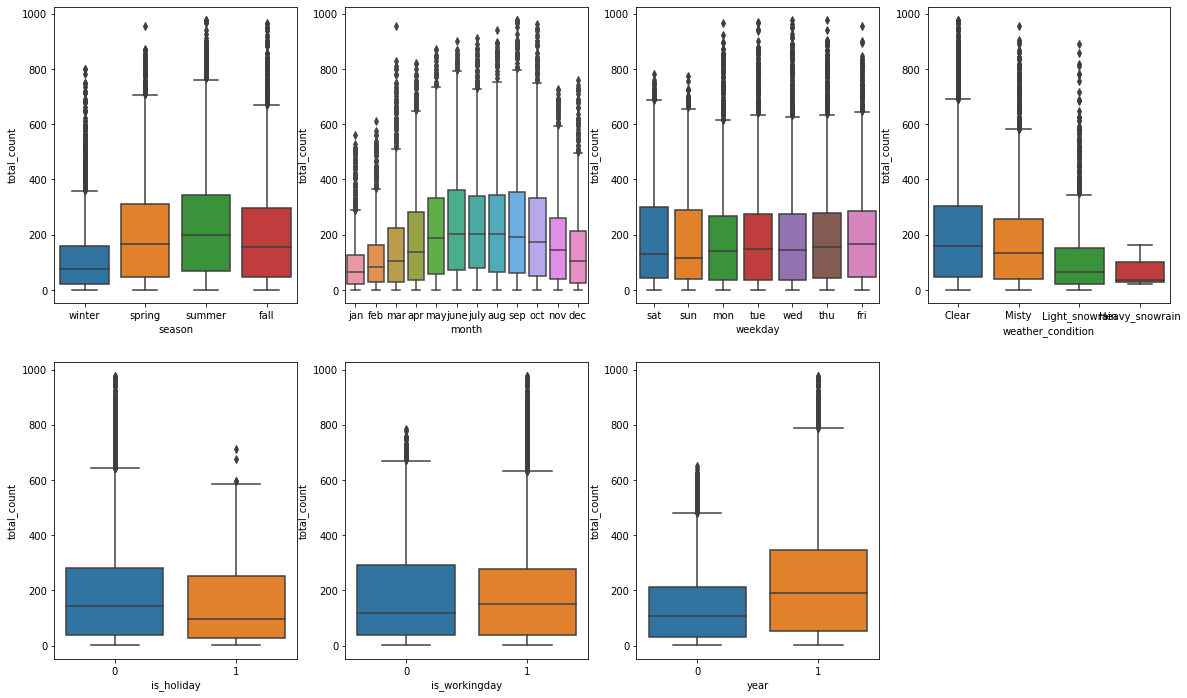

In [ ]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'total_count', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'total_count', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'total_count', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weather_condition', y = 'total_count', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'is_holiday', y = 'total_count', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'is_workingday', y = 'total_count', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'total_count', data = df)
plt.show()

In [ ]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'total_count',data=df,ci = None)
    plt.subplot(1,2,2)
    sns.barplot(column,'total_count',data=df, hue='year',ci = None)
    #plt.legend(labels=['2011', '2012'])
    plt.legend()
    plt.show()

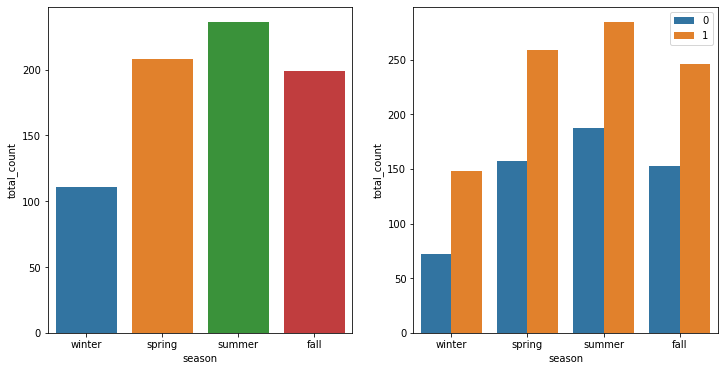

In [ ]:
# plotting visualization for season column

plot_cat_columns('season')

Summer season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2011 to 2012.

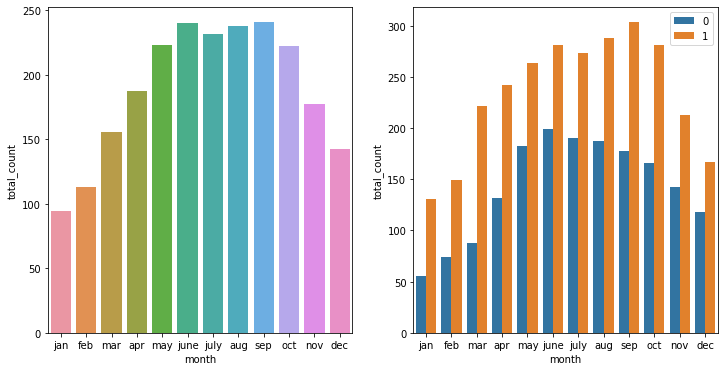

In [ ]:
# plotting visualization for month column

plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2011 to 2012, then further decreased.

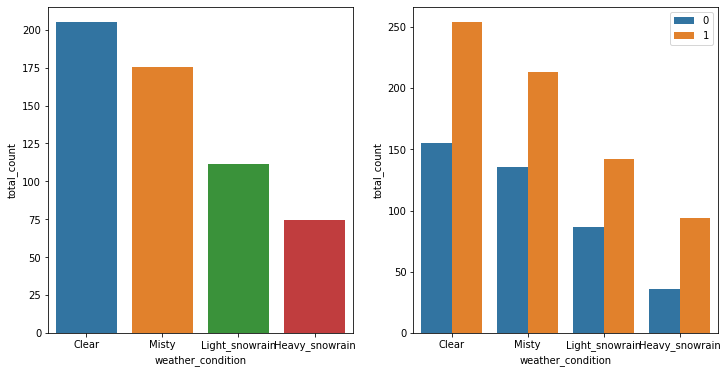

In [ ]:
# plotting visualization for weathersit column

plot_cat_columns('weather_condition')

Clear weather attracted more booking which seems obvious.

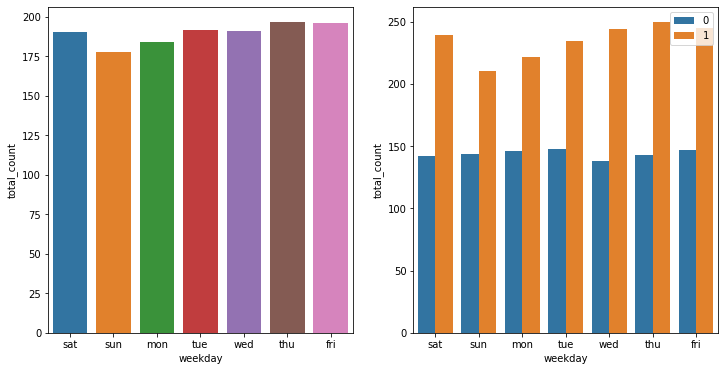

In [ ]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

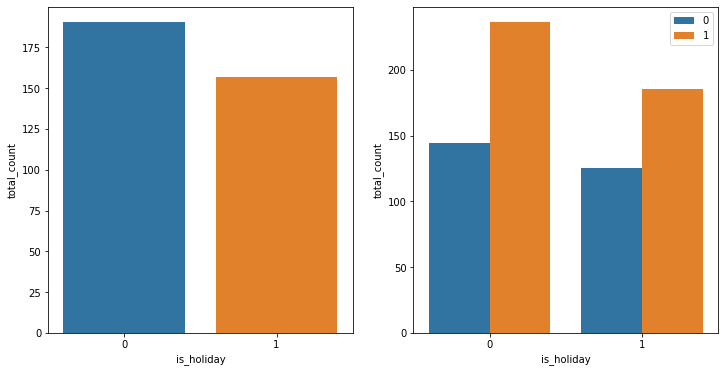

In [ ]:
# plotting visualization for holiday column

plot_cat_columns('is_holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

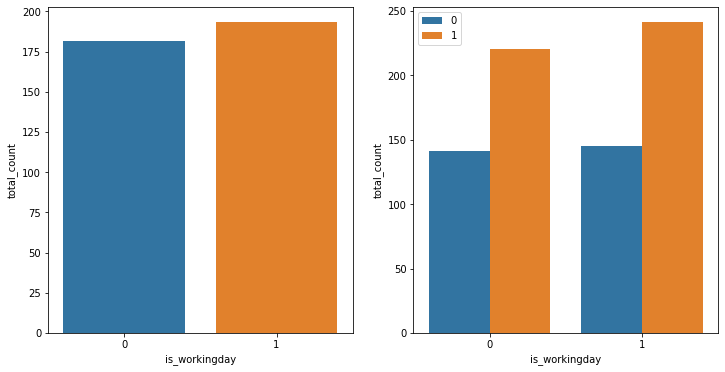

In [ ]:
# plotting visualization for workingday column

plot_cat_columns('is_workingday')

Booking seemed to be almost unequal either on working day or non-working day. But, the count increased from 2011 to 2012.

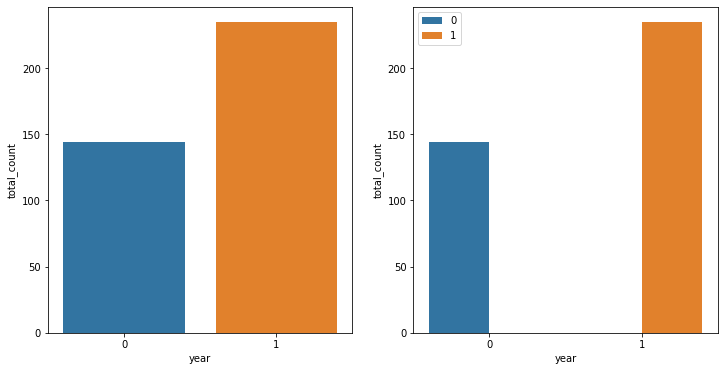

In [ ]:
# plotting visualization for year column

plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

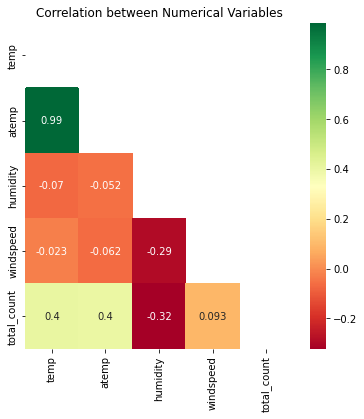

In [ ]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','total_count']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','total_count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 3: Data Preparation

In [ ]:
# Dummy variable creation for month, weekday, weathersit and season variables.

#months_df=pd.get_dummies(df.month,drop_first=True)
#weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
#weathersit_df=pd.get_dummies(df.weather_condition,drop_first=True)
#seasons_df=pd.get_dummies(df.season,drop_first=True)

In [ ]:

months_df=pd.get_dummies(df.month,drop_first=False)
weekdays_df=pd.get_dummies(df.weekday,drop_first=False)
weathersit_df=pd.get_dummies(df.weather_condition,drop_first=False)
seasons_df=pd.get_dummies(df.season,drop_first=False)

In [ ]:
df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
0,winter,0,jan,0,0,sat,0,Clear,0.24,0.2879,0.81,0.0,16
1,winter,0,jan,1,0,sat,0,Clear,0.22,0.2727,0.80,0.0,40
2,winter,0,jan,2,0,sat,0,Clear,0.22,0.2727,0.80,0.0,32
3,winter,0,jan,3,0,sat,0,Clear,0.24,0.2879,0.75,0.0,13
4,winter,0,jan,4,0,sat,0,Clear,0.24,0.2879,0.75,0.0,1


In [ ]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [ ]:
df_new.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
0,winter,0,jan,0,0,sat,0,Clear,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,1
1,winter,0,jan,1,0,sat,0,Clear,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,1
2,winter,0,jan,2,0,sat,0,Clear,0.22,0.2727,...,0,0,1,0,0,0,0,0,0,1
3,winter,0,jan,3,0,sat,0,Clear,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,1
4,winter,0,jan,4,0,sat,0,Clear,0.24,0.2879,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             17379 non-null  object 
 1   year               17379 non-null  int64  
 2   month              17379 non-null  object 
 3   hour               17379 non-null  int64  
 4   is_holiday         17379 non-null  int64  
 5   weekday            17379 non-null  object 
 6   is_workingday      17379 non-null  int64  
 7   weather_condition  17379 non-null  object 
 8   temp               17379 non-null  float64
 9   atemp              17379 non-null  float64
 10  humidity           17379 non-null  float64
 11  windspeed          17379 non-null  float64
 12  total_count        17379 non-null  int64  
 13  apr                17379 non-null  uint8  
 14  aug                17379 non-null  uint8  
 15  dec                17379 non-null  uint8  
 16  feb                173

In [ ]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weather_condition'], axis = 1, inplace = True)

In [ ]:
# check the head of new dataframe

df_new.head()

,year,hour,is_holiday,is_workingday,temp,atemp,humidity,windspeed,total_count,apr,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
0,0,0,0,0,0.24,0.2879,0.81,0.0,16,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0.22,0.2727,0.80,0.0,40,0,...,0,0,1,0,0,0,0,0,0,1
2,0,2,0,0,0.22,0.2727,0.80,0.0,32,0,...,0,0,1,0,0,0,0,0,0,1
3,0,3,0,0,0.24,0.2879,0.75,0.0,13,0,...,0,0,1,0,0,0,0,0,0,1
4,0,4,0,0,0.24,0.2879,0.75,0.0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# check the shape of new dataframe

df_new.shape

(17379, 36)

In [ ]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            17379 non-null  int64  
 1   hour            17379 non-null  int64  
 2   is_holiday      17379 non-null  int64  
 3   is_workingday   17379 non-null  int64  
 4   temp            17379 non-null  float64
 5   atemp           17379 non-null  float64
 6   humidity        17379 non-null  float64
 7   windspeed       17379 non-null  float64
 8   total_count     17379 non-null  int64  
 9   apr             17379 non-null  uint8  
 10  aug             17379 non-null  uint8  
 11  dec             17379 non-null  uint8  
 12  feb             17379 non-null  uint8  
 13  jan             17379 non-null  uint8  
 14  july            17379 non-null  uint8  
 15  june            17379 non-null  uint8  
 16  mar             17379 non-null  uint8  
 17  may             17379 non-null 

In [ ]:
#Define X and y
X = df_new.drop('total_count', axis=1)
y = df_new['total_count']

### Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13903, 35)
(3476, 35)
(13903,)
(3476,)


In [ ]:
X_train.head(2)

,year,hour,is_holiday,is_workingday,temp,atemp,humidity,windspeed,apr,aug,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
9143,1,21,0,0,0.18,0.1515,0.74,0.3284,0,0,...,0,0,1,0,0,0,0,0,0,1
17188,1,23,0,0,0.24,0.2879,0.60,0.0000,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_test.head(2)

,year,hour,is_holiday,is_workingday,temp,atemp,humidity,windspeed,apr,aug,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
9969,1,10,0,0,0.26,0.2273,0.60,0.3582,0,0,...,0,0,1,0,0,0,0,0,0,1
17244,1,9,0,1,0.20,0.1818,0.86,0.3284,0,0,...,0,1,0,0,1,0,0,0,0,1


## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

## Scale only these features

num_vars = ['temp','atemp','humidity','windspeed']


In [ ]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,year,hour,is_holiday,is_workingday,temp,atemp,humidity,windspeed,apr,aug,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
9143,1,21,0,0,0.163265,0.1515,0.74,0.386035,0,0,...,0,0,1,0,0,0,0,0,0,1
17188,1,23,0,0,0.224490,0.2879,0.60,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,1
5302,0,20,0,0,0.673469,0.6364,0.83,0.263195,0,1,...,0,0,0,0,0,1,0,0,1,0
7018,0,1,0,1,0.428571,0.4394,0.77,0.157870,0,0,...,1,0,1,0,0,0,1,0,0,0
7089,0,0,0,1,0.326531,0.3182,0.66,0.298225,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
X_test.head()

,year,hour,is_holiday,is_workingday,temp,atemp,humidity,windspeed,apr,aug,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
9969,1,10,0,0,0.255319,0.245942,0.60,0.428571,0,0,...,0,0,1,0,0,0,0,0,0,1
17244,1,9,0,1,0.191489,0.196711,0.86,0.392917,0,0,...,0,1,0,0,1,0,0,0,0,1
14026,1,15,0,0,0.787234,0.737719,0.40,0.160684,0,1,...,0,0,1,0,0,0,0,0,1,0
237,0,6,0,1,0.148936,0.196711,0.55,0.160684,0,0,...,1,0,0,0,0,1,0,0,0,1
8925,1,18,0,1,0.446809,0.475438,0.67,0.232113,0,0,...,0,0,1,0,0,0,0,0,0,1


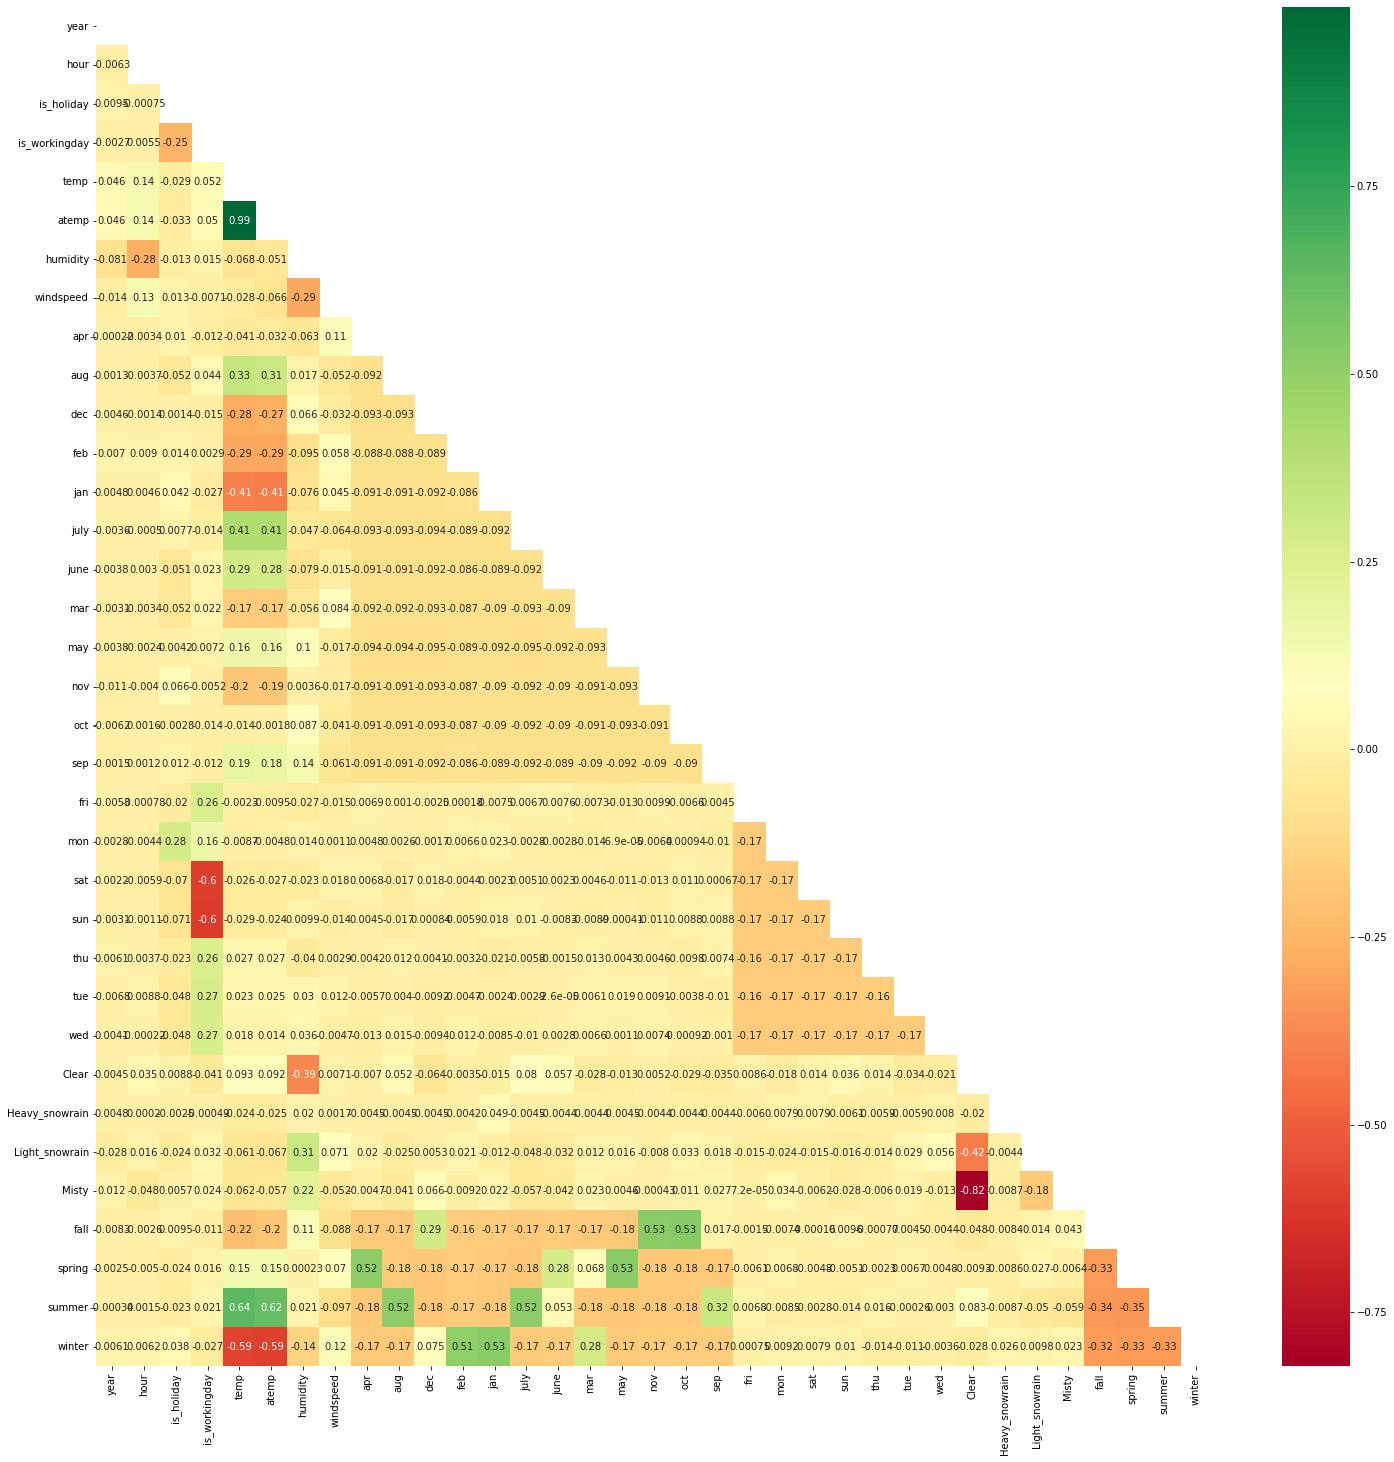

In [ ]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

In [ ]:
lm = LinearRegression()

lm.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

dfn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfn.head()

,Actual,Predicted
9969,183,126.667969
17244,23,7.703125
14026,577,379.019531
237,27,-1.300781
8925,421,257.597656


Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

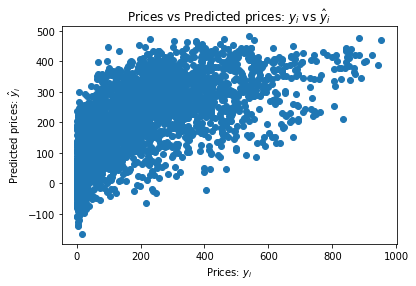

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

In [ ]:
#rmse = sklearn.metrics.mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred,squared=False)
print('MSE using linear regression is::',rmse)

rsq  = r2_score(y_test, y_pred)
print('R-Squared using linear regression is::',rsq)

MSE using linear regression is:: 140.19754556702964
R-Squared using linear regression is:: 0.3944430360395128


#Old portion

In [ ]:
# splitting the dataframe into Train and Test

#np.random.seed(0)
#df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [ ]:
# check the shape of training datatset

#df_train.shape

In [ ]:
# check the shape of testing datatset

#df_test.shape

In [ ]:
# Using MinMaxScaler to Rescaling the features

#scaler = MinMaxScaler()

In [ ]:
# verifying the head of dataset before scaling.

#df_train.head()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

#num_vars = ['temp','atemp','humidity','windspeed','total_count']
#num_vars = ['temp','atemp','humidity','windspeed']
#df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
# verifying the head after appying scaling.

#df_train.head()

In [ ]:
# check the correlation coefficients to see which variables are highly correlated

#plt.figure(figsize = (25,25))
#matrix = np.triu(df_train.corr())
#sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
#plt.show()

In [ ]:
# Building the Linear Model

#y_train = df_train.pop('total_count')
#X_train = df_train

#Linear regression without dropping features

In [ ]:
# Applying scaling on the test dataset

#num_vars = ['temp', 'atemp', 'humidity', 'windspeed']

#df_test[num_vars] = scaler.transform(df_test[num_vars])

#y_test = df_test.pop('total_count')
#X_test = df_test

In [ ]:
#lm = LinearRegression()

#lm.fit(X_train, y_train)

#y_pred = lm.predict(X_test)

#dfn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#dfn.head()


In [ ]:
#plt.scatter(y_test, y_pred)
#plt.xlabel("Prices: $y_i$")
#plt.ylabel("Predicted prices: $\hat{y}_i$")
#plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")


In [ ]:
#rmse = sklearn.metrics.mean_squared_error(y_test, y_pred)
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(y_test, y_pred,squared=False)
#print('MSE using linear regression is::',rmse)

#rsq  = r2_score(y_test, y_pred)
#print('R-Squared using linear regression is::',rsq)